<a href="https://colab.research.google.com/github/Sinha123456/projects_jupyter/blob/master/nooneshowappointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project details and working platform:**
## No show appointment project is done by google colab platform.
## For this project data is provided by the kaggle. 
## This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 


# Mounted drive
Data can be access from drive to colab notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Import packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

Loding a data, using pandas read function.

In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/udacity_projects/noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Data Wrangling

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(110527, 14)

**Data wranling investigation:**
There are no null values and duplicated attributes in the dataset. There are 110527 rows and 14 columns in the dataset.
. ScheduledDay and AppointmentDay columns are in string, need to be parse in date time columns.In the age column mean age is 37, min age -1, and max age 115, need to investigate more about the age column. Very few patients are Alcoholism and Handcap.

# **Data Cleaning**

* dropping unneccessary columns
* parsing date columns: ScheduledDay and AppointmentDay
* Encoding No show column
* Extract string from ScheduledDay and AppointmentDay
* Add date, day, and time columns
* Converting columns in lowercase





converting dataframe columns in lowercase

In [11]:
df.columns.str.lower()

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [12]:
df['PatientId'].duplicated().sum()

48228

In [13]:
df['PatientId'].nunique()

62299

62299 unique patientId.

Convert PatientId(scientific notion) to int, check the column and datatype. 

In [14]:
df['PatientId'] = df['PatientId'].apply(lambda x : '%.0f' %x).astype(int)

In [15]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


Before doing more cleaning, need to be visualize all attributes
that would help to see outliers and skew status in the plot.

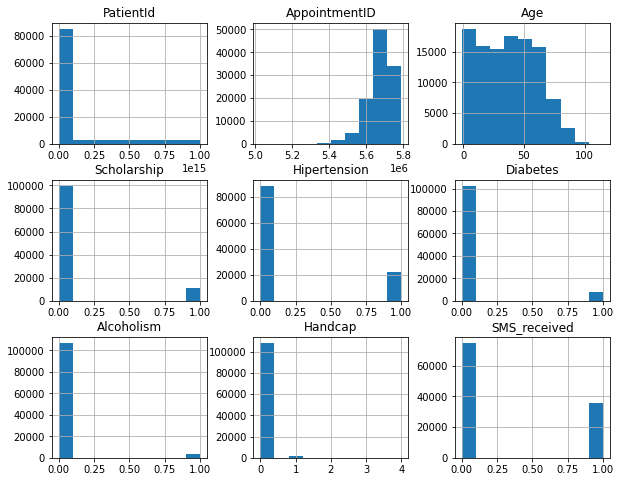

In [17]:
df.hist(figsize = (10,8))
plt.show()

In the above plot showing that Age column is more skewed to the left.
columns are in boolean fromat: 1 is True and 0 is False
Only few people have a scholarship.
Maximum people do not have Diabetes, Alcoholism and handcap: 
Most of the people get 0 messages for their appointments, 



Renaming column name 

In [18]:
df.rename(columns = {'No-show': 'No_show'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


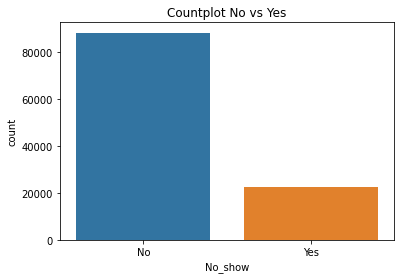

In [19]:
sns.countplot('No_show', data = df)
plt.title("Countplot No vs Yes")
plt.show()


In No_show column, there are two values 'No' and 'Yes'. In that dataset No means people they showed up on their appoinment and Yes means people didn't show up. Only few people didn't show up on their appointments


*  Encoding No_show column



In [20]:
df['no_show'] = df['No_show'].map({'No': 1, 'Yes': 0})



*  Check the column if it's encoded
*  Drop the No_show column which is categorical value and keep the encoded column.



In [21]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1


In [22]:
df.drop('No_show', axis = 1, inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


Converting appointmentday and scheduleday to datetime columns,
make seprate columns 'Day' and 'Time' for these two columns.

In [23]:
import datetime
df['Schedule_Date'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['Schedule_Time'] = pd.to_datetime(df['ScheduledDay']).dt.time

In [24]:
df['Appointtment_Day'] = pd.to_datetime(df['AppointmentDay']).dt.date 
df['Appointment_Time'] = pd.to_datetime(df['AppointmentDay']).dt.time

In [25]:
df.dtypes

PatientId            int64
AppointmentID        int64
Gender              object
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handcap              int64
SMS_received         int64
no_show              int64
Schedule_Date       object
Schedule_Time       object
Appointtment_Day    object
Appointment_Time    object
dtype: object

In [26]:
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,Schedule_Date,Schedule_Time,Appointtment_Day,Appointment_Time
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1,2016-05-03,09:15:35,2016-06-07,00:00:00
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1,2016-05-03,07:27:33,2016-06-07,00:00:00
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1,2016-04-27,16:03:52,2016-06-07,00:00:00
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1,2016-04-27,15:09:23,2016-06-07,00:00:00
110526,377511518121127,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,1,2016-04-27,13:30:56,2016-06-07,00:00:00


In [27]:
df.groupby('no_show')['Age'].value_counts()

no_show  Age 
0         0      639
          1      415
          17     396
          19     394
          30     369
                ... 
1         100      4
          102      2
          115      2
         -1        1
          99       1
Name: Age, Length: 204, dtype: int64

In [28]:
df.query('Age <= 0').head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,Schedule_Date,Schedule_Time,Appointtment_Day,Appointment_Time
59,71844284745331,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,1,2016-04-29,08:08:43,2016-04-29,00:00:00
63,236623344873175,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,1,2016-04-27,10:46:12,2016-04-29,00:00:00
64,188517384712787,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,1,2016-04-25,13:28:21,2016-04-29,00:00:00
65,271881817799985,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,1,2016-04-27,10:48:50,2016-04-29,00:00:00
67,86471282513499,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,1,2016-04-29,08:53:02,2016-04-29,00:00:00


In [29]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,Schedule_Date,Schedule_Time,Appointtment_Day,Appointment_Time
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,1,2016-06-06,08:58:13,2016-06-06,00:00:00


In the Age column lots of 0 values and one value is -1. From the mentor help page got some clue to deal with it.

In [30]:
df[df['Age']<=0] = df['Age'].mean()

In [83]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,Schedule_Date,Schedule_Time,Appointtment_Day,Appointment_Time


In [31]:
df.query('Age <= 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,Schedule_Date,Schedule_Time,Appointtment_Day,Appointment_Time


In [32]:
df.shape

(110527, 18)

Now, There are no 0 and -1 values in the Age column

Check the datatype

In [33]:
df.dtypes

PatientId           float64
AppointmentID       float64
Gender               object
ScheduledDay         object
AppointmentDay       object
Age                 float64
Neighbourhood        object
Scholarship         float64
Hipertension        float64
Diabetes            float64
Alcoholism          float64
Handcap             float64
SMS_received        float64
no_show             float64
Schedule_Date        object
Schedule_Time        object
Appointtment_Day     object
Appointment_Time     object
dtype: object

In [34]:
df['Age'] = df['Age'].astype(int)

In [35]:
!git clone https://github.com/Sinha123456/projects_jupyter.git


fatal: destination path 'projects_jupyter' already exists and is not an empty directory.
